In [5]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

Customer = pd.read_csv( 'Customer.csv')
Prod = pd.read_csv( 'prod_cat_info.csv')
Transactions = pd.read_csv( 'Transactions.csv')

In [7]:
Customer

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0
...,...,...,...,...
5642,274474,19-12-1992,M,2.0
5643,267666,24-12-1992,M,6.0
5644,270476,25-12-1992,F,3.0
5645,269626,27-12-1992,F,5.0


# soal no 1

In [8]:
transaction_customer = pd.merge(Transactions,Customer,left_on='cust_id',right_on='customer_Id')
transaction_customer_prod = pd.merge(transaction_customer,Prod,left_on=['prod_subcat_code','prod_cat_code'] ,right_on=['prod_cat_code', 'prod_cat_code'])

In [9]:
transaction_customer_prod

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.30,-4265.30,e-Shop,270351,26-09-1981,M,5.0,Clothing,4,Mens
1,80712190438,270351,28-02-2014,1,1,-5,-772,405.30,-4265.30,e-Shop,270351,26-09-1981,M,5.0,Clothing,1,Women
2,80712190438,270351,28-02-2014,1,1,-5,-772,405.30,-4265.30,e-Shop,270351,26-09-1981,M,5.0,Clothing,3,Kids
3,80712190438,270351,20-02-2014,1,1,5,772,405.30,4265.30,e-Shop,270351,26-09-1981,M,5.0,Clothing,4,Mens
4,80712190438,270351,20-02-2014,1,1,5,772,405.30,4265.30,e-Shop,270351,26-09-1981,M,5.0,Clothing,1,Women
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5000,18727956164,267161,23-02-2011,4,4,5,668,350.70,3690.70,e-Shop,267161,08-05-1981,M,9.0,Bags,4,Women
5001,60416814232,273281,18-02-2011,4,4,4,202,84.84,892.84,Flagship store,273281,14-12-1988,F,9.0,Bags,1,Mens
5002,60416814232,273281,18-02-2011,4,4,4,202,84.84,892.84,Flagship store,273281,14-12-1988,F,9.0,Bags,4,Women
5003,83245680995,273723,26-01-2011,4,4,4,1477,620.34,6528.34,e-Shop,273723,21-01-1984,F,4.0,Bags,1,Mens


jumlah data yang tersedia adalah 5005 data

# soal no 2

In [52]:
import pandas as pd
import numpy as np
df = pd.read_csv("Transactions.csv", low_memory=False, parse_dates=["tran_date"])
df.groupby(["Store_type", "tran_date"]).agg({"Tax": "mean", "cust_id": "count"})

Tax  cust_id
Store_type     tran_date                      
Flagship store 2011-01-02  169.386000        5
               2011-01-03  137.497500        2
               2011-01-04  173.040000        6
               2011-01-05   93.835000        3
               2011-01-06  150.535000        3
...                               ...      ...
e-Shop         2014-10-02  204.723750        8
               2014-11-01  334.385625        8
               2014-11-02  256.920000        7
               2014-12-01  131.946818       11
               2014-12-02  136.791667        9

[4431 rows x 2 columns]

In [55]:
df2 = df.groupby(["Store_type", "tran_date"]).agg({"Tax": ["mean",
                "max", "min"], "cust_id": "count"})
print (df2)

                                  Tax                  cust_id
                                 mean      max     min   count
Store_type     tran_date                                      
Flagship store 2011-01-02  169.386000  396.270  41.160       5
               2011-01-03  137.497500  233.625  41.370       2
               2011-01-04  173.040000  378.000  37.275       6
               2011-01-05   93.835000  206.850  30.135       3
               2011-01-06  150.535000  280.140  80.325       3
...                               ...      ...     ...     ...
e-Shop         2014-10-02  204.723750  359.940   9.135       8
               2014-11-01  334.385625  707.175  52.080       8
               2014-11-02  256.920000  756.000  56.805       7
               2014-12-01  131.946818  356.475  15.225      11
               2014-12-02  136.791667  391.860   8.190       9

[4431 rows x 4 columns]


# Soal no 3

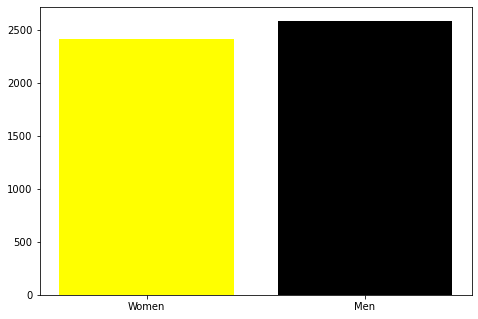

Gender
F    2412
M    2587
Name: transaction_id, dtype: int64

In [13]:
byGender = transaction_customer_prod.groupby(by=["Gender"]).count()
female = byGender['transaction_id'][0]
male =  byGender['transaction_id'][1]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Women', 'Men']
ax.bar(langs,[female, male], color=['yellow', 'black'])
plt.show()
byGender['transaction_id']

jumlah pelanggan berdasarkan data yang telah ada adalah Women 2412 dan men 2587

# soal no 4

In [14]:
byProdCategory = transaction_customer_prod.groupby(by=["prod_cat", "Gender"]).count()
byProdCategory['transaction_id']

prod_cat  Gender
Bags      F         1020
          M          970
Clothing  F         1392
          M         1617
Name: transaction_id, dtype: int64

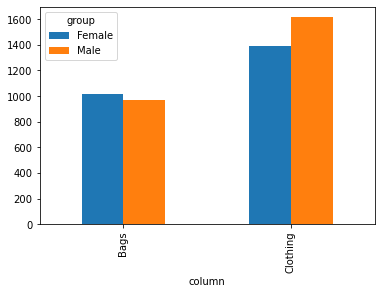

In [28]:
df = pd.DataFrame([['Female','Bags',byProdCategory['transaction_id'][0]],
                   ['Female','Clothing',byProdCategory['transaction_id'][2]],
                   ['Male  ','Bags',byProdCategory['transaction_id'][1]],
                   ['Male  ','Clothing',byProdCategory['transaction_id'][3]]],
                  columns=['group','column','val'])

df.pivot("column", "group", "val").plot(kind='bar')

plt.show()

product kategori yang paling banyak diminati laki-laki Clothing sebanyak 1617

# soal no 5

In [29]:
byProdCategory = transaction_customer_prod.groupby(by=["prod_cat", "Gender"]).count()
byProdCategory['transaction_id']

prod_cat  Gender
Bags      F         1020
          M          970
Clothing  F         1392
          M         1617
Name: transaction_id, dtype: int64

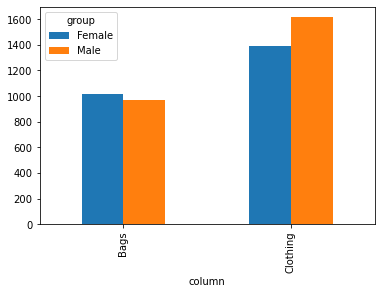

In [30]:
df = pd.DataFrame([['Female','Bags',byProdCategory['transaction_id'][0]],['Female','Clothing',byProdCategory['transaction_id'][2]],
                   ['Male  ','Bags',byProdCategory['transaction_id'][1]],['Male  ','Clothing',byProdCategory['transaction_id'][3]]],columns=['group','column','val'])

df.pivot("column", "group", "val").plot(kind='bar')

plt.show()

product kategori yang paling banyak diminati perempuan Clothing sebanyak 1392

# soal no 6

In [71]:
byQty = transaction_customer_prod.groupby(by=[  "prod_cat", "Store_type"]).count()
byQty['cust_id']

prod_cat  Store_type    
Bags      Flagship store     392
          MBR                428
          TeleShop           394
          e-Shop             776
Clothing  Flagship store     600
          MBR                678
          TeleShop           546
          e-Shop            1191
Name: cust_id, dtype: int64

# soal no 7

In [33]:
transaction_customer_prod['month'] = pd.DatetimeIndex(transaction_customer_prod['tran_date']).month
byDate = transaction_customer_prod.groupby(by=[ "month", "prod_cat"]).count()
byDate["transaction_id"]

month  prod_cat
1      Bags        164
       Clothing    309
2      Bags        158
       Clothing    222
3      Bags        180
       Clothing    252
4      Bags        168
       Clothing    201
5      Bags        164
       Clothing    243
6      Bags        182
       Clothing    225
7      Bags        176
       Clothing    246
8      Bags        156
       Clothing    255
9      Bags        170
       Clothing    252
10     Bags        154
       Clothing    324
11     Bags        168
       Clothing    270
12     Bags        150
       Clothing    216
Name: transaction_id, dtype: int64

<AxesSubplot:xlabel='month'>

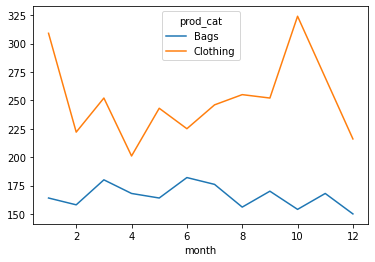

In [35]:
byDate["transaction_id"].unstack().plot()

In [40]:
transaction_customer_prod['month'] 


0       2
1       2
2       2
3       2
4       2
       ..
5000    2
5001    2
5002    2
5003    1
5004    1
Name: month, Length: 5005, dtype: int64

In [41]:
pd.DatetimeIndex(transaction_customer_prod['tran_date']).month

Int64Index([ 2,  2,  2,  2,  2,  2, 12, 12, 12,  8,
            ...
             9,  9,  3,  3,  2,  2,  2,  2,  1,  1],
           dtype='int64', name='tran_date', length=5005)